# 3 Autogen - Stocks examples

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

17/06/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen.coding import LocalCommandLineCodeExecutor
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


## 1. Settings

In [5]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

In [6]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"tags": ["gpt-4"]},  # comment out to get all
)
# When using a single openai endpoint, you can use the following:
# config_list = [{"model": "gpt-4", "api_key": os.getenv("OPENAI_API_KEY")}]

## 2. Agents

In [7]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,
        "config_list": config_list,
        "temperature": 0,
    },
)

In [8]:
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith(
        "TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir=WORK_DIR),
    },
)

In [9]:
assistant

In [10]:
user_proxy

## 3. Examples

In the above example, the summary method is set to **reflection_with_llm** which takes a list of messages from the conversation and summarize them using a call to an LLM.

https://microsoft.github.io/autogen/docs/tutorial/conversation-patterns/

In [11]:
# the assistant receives a message from the user_proxy, which contains the task description
chat_res = user_proxy.initiate_chat(
    assistant,
    message=
    """What is the current date today? Compare the year-to-date gain for META and TESLA.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

What is the current date today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To solve this task, we will need to:

1. Get the current date using Python's datetime module.
2. Fetch the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the yfinance module in Python to fetch the stock data.

Let's start with the first step, getting the current date.

```python
# python code
import datetime

# Get the current date
current_date = datetime.date.today()

print("Today's date is:", current_date)
```

Please execute the above code to get the current date. After that, we will proceed to fetch the YTD gain for META and TESLA.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
user_proxy (to assistant):

exitcode: 0 (execution succeeded)
Code output

In [12]:
chat_res

ChatResult(chat_id=None, chat_history=[{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'To solve this task, we will need to:\n\n1. Get the current date using Python\'s datetime module.\n2. Fetch the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the yfinance module in Python to fetch the stock data.\n\nLet\'s start with the first step, getting the current date.\n\n```python\n# python code\nimport datetime\n\n# Get the current date\ncurrent_date = datetime.date.today()\n\nprint("Today\'s date is:", current_date)\n```\n\nPlease execute the above code to get the current date. After that, we will proceed to fetch the YTD gain for META and TESLA.', 'role': 'user'}, {'content': "exitcode: 0 (execution succeeded)\nCode output: Today's date is: 2024-06-17\n", 'role': 'assistant'}, {'content': "Great, now that we have the current date, let's proceed to the next step. We will fetch the year-to-d

In [13]:
print("\033[1;31;34m")
print("Chat history:", chat_res.chat_history)


Chat history: [{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'To solve this task, we will need to:\n\n1. Get the current date using Python\'s datetime module.\n2. Fetch the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the yfinance module in Python to fetch the stock data.\n\nLet\'s start with the first step, getting the current date.\n\n```python\n# python code\nimport datetime\n\n# Get the current date\ncurrent_date = datetime.date.today()\n\nprint("Today\'s date is:", current_date)\n```\n\nPlease execute the above code to get the current date. After that, we will proceed to fetch the YTD gain for META and TESLA.', 'role': 'user'}, {'content': "exitcode: 0 (execution succeeded)\nCode output: Today's date is: 2024-06-17\n", 'role': 'assistant'}, {'content': "Great, now that we have the current date, let's proceed to the next step. We will fetch the year-to-date (YTD) gain for META

In [14]:
print("\033[1;31;34m")
print("Summary:", chat_res.summary)


Summary: As of June 17, 2024, the year-to-date (YTD) gain for META (Facebook) is approximately 45.59%, indicating an increase in stock value since the start of the year. Conversely, the YTD gain for TESLA is approximately -28.34%, indicating a decrease in stock value since the start of the year.


In [15]:
chat_res.cost

{'usage_including_cached_inference': {'total_cost': 0.13907999999999998,
  'gpt-4': {'cost': 0.13907999999999998,
   'prompt_tokens': 3158,
   'completion_tokens': 739,
   'total_tokens': 3897}},
 'usage_excluding_cached_inference': {'total_cost': 0.13907999999999998,
  'gpt-4': {'cost': 0.13907999999999998,
   'prompt_tokens': 3158,
   'completion_tokens': 739,
   'total_tokens': 3897}}}

### Another example

In [16]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message=
    """Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.""",
)

user_proxy (to assistant):

Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the stock price change YTD for META and TESLA, and save the data to a CSV file and the plot to a PNG file, we can use the pandas and matplotlib libraries in Python. 

If you don't have these libraries installed, you can install them using pip:

```sh
# shell script
pip install pandas matplotlib
```

After installing pandas and matplotlib, please execute the following Python code:

```python
# python code
import pandas as pd
import matplotlib.pyplot as plt

# Combine the data for META and TESLA
combined_data = pd.concat([meta_data['Close'], tesla_data['Close']], axis=1)
combined_data.columns = ['META', 'TESLA']

# Save the data to a CSV file
combined_data.to_csv('meta_tesla.csv')

# Plot the data
combined_data.plot(

In [17]:
with open(os.path.join(WORK_DIR, 'meta_tesla.csv'), 'r') as f:
    print(f.read())

Date,META,TESLA
2024-01-02,346.2900085449219,248.4199981689453
2024-01-03,344.4700012207031,238.4499969482422
2024-01-04,347.1199951171875,237.92999267578125
2024-01-05,351.95001220703125,237.49000549316406
2024-01-08,358.6600036621094,240.4499969482422
2024-01-09,357.42999267578125,234.9600067138672
2024-01-10,370.4700012207031,233.94000244140625
2024-01-11,369.6700134277344,227.22000122070312
2024-01-12,374.489990234375,218.88999938964844
2024-01-16,367.4599914550781,219.91000366210938
2024-01-17,368.3699951171875,215.5500030517578
2024-01-18,376.1300048828125,211.8800048828125
2024-01-19,383.45001220703125,212.19000244140625
2024-01-22,381.7799987792969,208.8000030517578
2024-01-23,385.20001220703125,209.13999938964844
2024-01-24,390.70001220703125,207.8300018310547
2024-01-25,393.17999267578125,182.6300048828125
2024-01-26,394.1400146484375,183.25
2024-01-29,401.0199890136719,190.92999267578125
2024-01-30,400.05999755859375,191.58999633789062
2024-01-31,390.1400146484375,187.289993

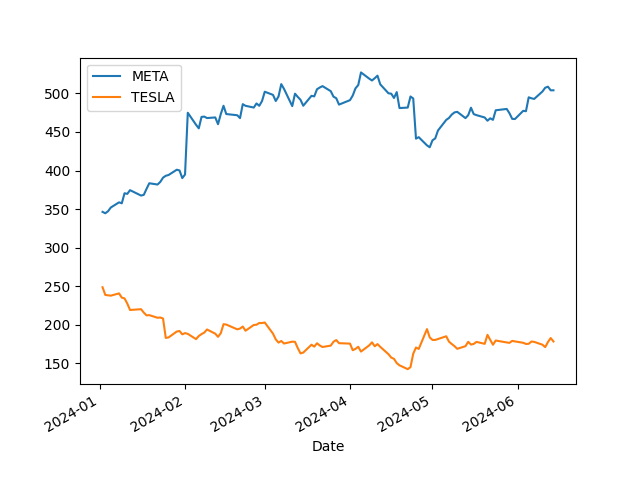

In [18]:
img = Image.open(os.path.join(WORK_DIR, 'meta_tesla.png'))
img

In [19]:
!ls $WORK_DIR/meta_tesla.* -lh

-rwxrwxrwx 1 root root 5.3K Jun 17 10:24 workdir/meta_tesla.csv
-rwxrwxrwx 1 root root  33K Jun 17 10:24 workdir/meta_tesla.png


In [20]:
user_proxy.send(
    recipient=assistant,
    message=
    """Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt""",
)

user_proxy (to assistant):

Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt

--------------------------------------------------------------------------------
assistant (to user_proxy):

To generate a financial analysis based on the stock prices, we can calculate some common financial metrics such as:

1. The mean closing price
2. The maximum closing price
3. The minimum closing price
4. The standard deviation of the closing price, which gives us an idea of the volatility of the stock price

We will calculate these metrics for both META and TESLA, and save the results into a text file named 'meta_tesla.txt'.

Please execute the following Python code:

```python
# python code
# Calculate the financial metrics
meta_mean = combined_data['META'].mean()
meta_max = combined_data['META'].max()
meta_min = combined_data['META'].min()
meta_std = combined_data['META'].std()

tesla_mean = combined_data['TESLA'].mean()
tesla_max = combined_data['TESL

In [21]:
!ls $WORK_DIR/meta_tesla.txt -lh

-rwxrwxrwx 1 root root 366 Jun 17 10:25 workdir/meta_tesla.txt


In [22]:
with open(os.path.join(WORK_DIR, 'meta_tesla.txt'), 'r') as f:
    print(f.read())


META:
Mean closing price: 463.35173976732335
Maximum closing price: 527.3400268554688
Minimum closing price: 344.4700012207031
Standard deviation of closing price: 47.67217316763349

TESLA:
Mean closing price: 184.607391490107
Maximum closing price: 248.4199981689453
Minimum closing price: 142.0500030517578
Standard deviation of closing price: 20.431945962859285

